In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [12]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [40]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


year_temps = calc_temps('2017-02-05', '2017-02-12')

t_min, t_avg, t_max = year_temps[0]

print(f"min temp : {t_min}")
print(f"avg temp : {t_avg}")
print(f"max temp : {t_max}")
# for a year in the data set

min temp : 59.0
avg temp : 69.05660377358491
max temp : 80.0


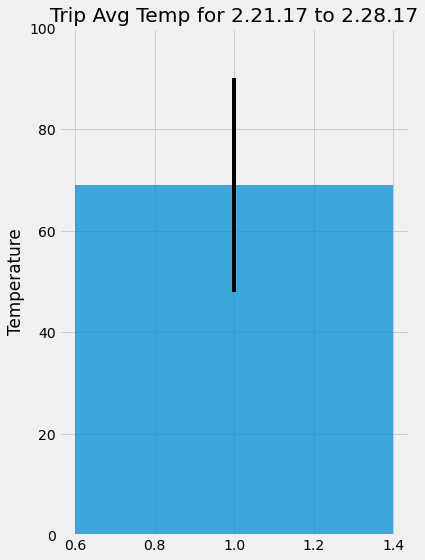

In [41]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
error = t_max - t_min
xpos = 1
plt.figure(figsize=(6, 8))
plt.bar(xpos, t_avg, yerr=error, alpha=0.75)
plt.title(f"Trip Avg Temp for 2.21.17 to 2.28.17")
plt.xlabel("")
plt.ylabel("Temperature")
plt.yticks(np.arange(0, 120, 20))
plt.tight_layout()
plt.savefig("Images/trip_temp_avg.png")





### Daily Rainfall Average

In [42]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_start = "2016-02-05"
trip_end = "2016-02-12"

rainfall = (session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.avg(Measurement.prcp)).\
                filter(Measurement.station == Station.station,Measurement.date.between(trip_start,trip_end)).\
                group_by(Station.station).order_by(func.avg(measurement.prcp).desc()).all())
raindf = pd.DataFrame(np.array(rainfall))
raindf = raindf.rename(columns= {0: "Stations", 1: "Location", 2: "Latitude", 3: "Longitude", 4: "Elevation", 5: "Precipitation"})
raindf

,Stations,Location,Latitude,Longitude,Elevation,Precipitation
0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0,0.07
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,0.0475
2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,0.02875
3,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84888999999998,32.9,0.007500000000000001
4,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.00625
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.0
6,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9,0.0


### Daily Temperature Normals

In [43]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [100]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
trip_startformat = dt.date(2017, 2, 5)
trip_endformat = dt.date(2017, 2, 12)
# Set the start and end date of the trip


# Use the start and end date to create a range of dates
date_range = pd.date_range(trip_startformat, trip_endformat)

# Strip off the year and save a list of strings in the format %m-%d
date_list = [d.strftime("%m-%d") for d in date_range]


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
daily_norms = [daily_normals for x in date_list] 
normals = daily_norms[0]


In [101]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normal_df = pd.DataFrame(normals, columns=["tmin", "tavg", "tmax"], index=date_range)
daily_normal_df.index.name = "Date"
daily_normal_df

,tmin,tavg,tmax
Date,,,
2017-02-05,59.0,69.684211,80.0
2017-02-06,58.0,70.389831,77.0
2017-02-07,60.0,69.000000,77.0
2017-02-08,56.0,66.754386,74.0
2017-02-09,57.0,67.589286,75.0
2017-02-10,56.0,68.416667,76.0
2017-02-11,61.0,69.250000,79.0
2017-02-12,60.0,69.157895,78.0


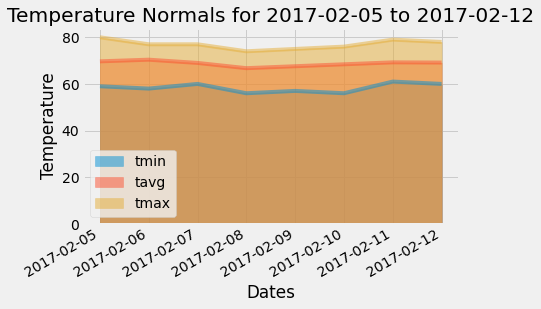

In [102]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normal_df.plot(kind="area", stacked=False, x_compat=True)
plt.title(f"Temperature Normals for 2017-02-05 to 2017-02-12")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.savefig("Images/normal_stacked.png")

## Close Session

In [103]:
# Close Session
session.close()